# Prediction using Decision Tree Algorithm - by Sumam Jose

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset to be used for analysis.
data = pd.read_csv(r'C:\Users\sumam\OneDrive\Desktop\GRIP Internship\Iris.csv')

# Display the first 5 rows of the dataset.
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Display the number of rows and columns of the dataset.
data.shape

(150, 6)

The Iris dataset consists of 150 rows and 6 columns.

In [4]:
# Display the general information and datatypes of the variables in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no missing values in the dataset.

In [5]:
# Display the general summary statistics for each variable in the dataset.
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Since Decision Tree Classifier is being used, scaling of features is not necessary.

In [6]:
# Display the value counts for the only categoric variable, 'Species' in the dataset.
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

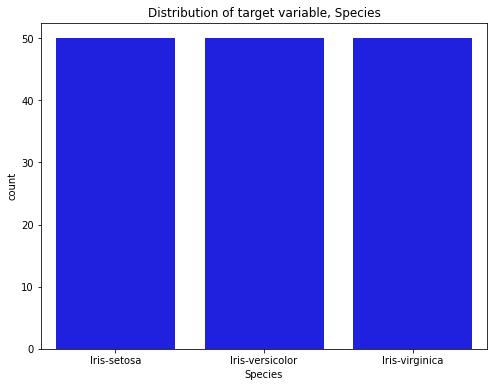

In [7]:
# Countplot to visualize the target variable, 'Species'.
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Species'], color = 'blue')
plt.title('Distribution of target variable, Species')
plt.show()

This is a dataset with balanced class distribution. There are 3 target classes and hence multi-class classification is to be used here.

In [8]:
# Divide the dataset into features, X and target, y.
y = data['Species']
X = data[data.columns[1:5]] # Id column is not considered as uninformative.
# To print features, X and target, y.
print ("X: \n", X.head())
print ("y: \n", y.head())

X: 
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
y: 
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


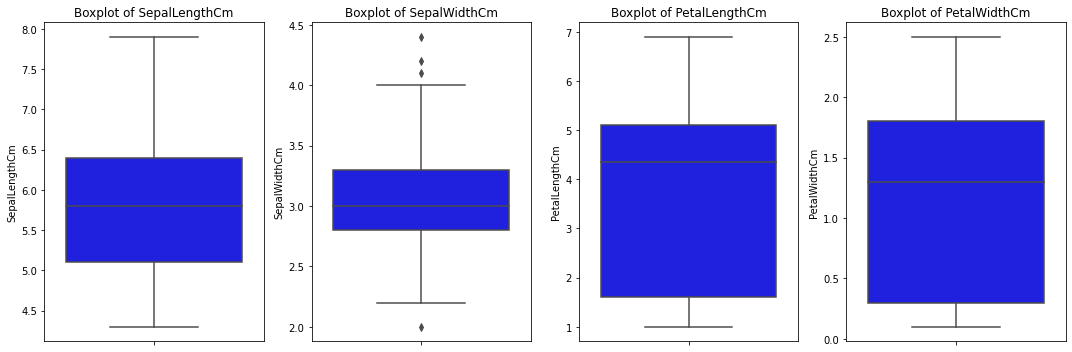

In [9]:
# Function to plot Boxplot of all features in the dataset.
def box_plot(dataset_boxplot):
    plt.figure(figsize=(15, 5))
    for i in range(0, len(dataset_boxplot.columns)):
        plt.subplot(1, 4, i+1)
        sns.boxplot(y=dataset_boxplot.iloc[:,i],color='blue',orient='v')
        plt.title('Boxplot of {}'.format(dataset_boxplot.columns[i]))
        plt.tight_layout()
# Plot boxplots for the features in the dataset.
box_plot(X)   

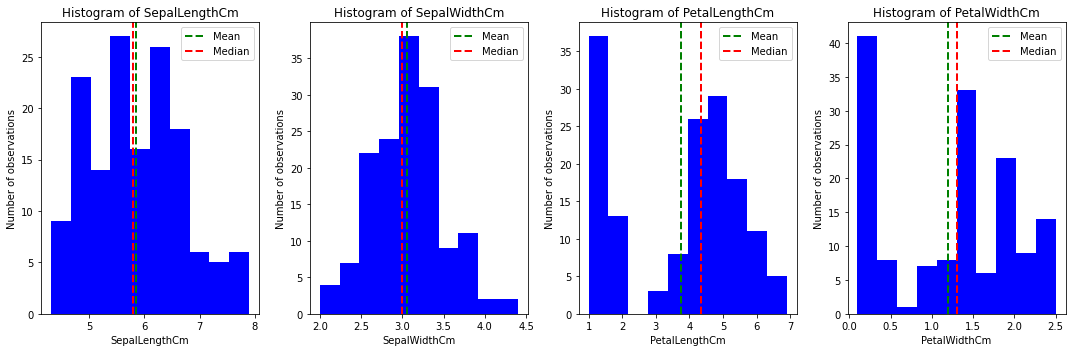

In [10]:
# Function to plot Histogram of all features in the dataset.
def hist(dataset_hist):
    plt.figure(figsize=(15, 5))
    for i in range(0, len(dataset_hist.columns)):
        plt.subplot(1, 4, i+1)
        plt.hist(x=dataset_hist.iloc[:,i], color='blue')
        # To mark the mean and median in the plot.
        plt.axvline(x=dataset_hist.iloc[:,i].mean(), color = 'green', linestyle='dashed', linewidth = 2, label = 'Mean')
        plt.axvline(x=dataset_hist.iloc[:,i].median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
        plt.xlabel(dataset_hist.columns[i])
        plt.ylabel('Number of observations')
        plt.title('Histogram of {}'.format(dataset_hist.columns[i]))
        plt.legend()
        plt.tight_layout()
# Plot Histograms of the features in the dataset with mean and median marked.
hist(X)

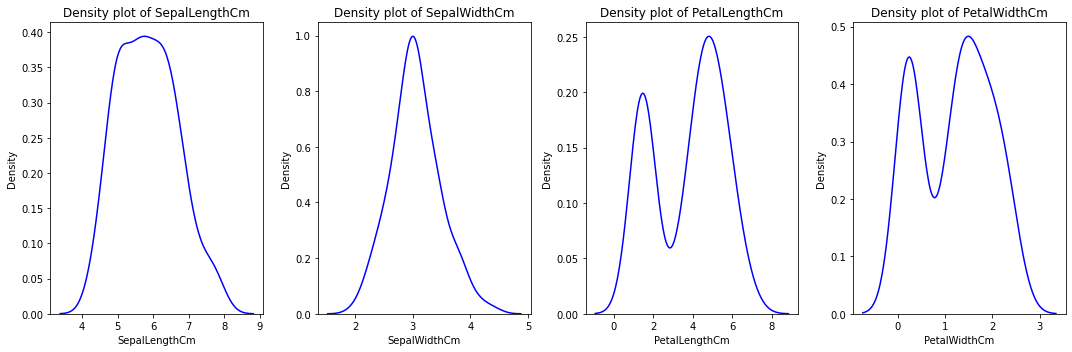

In [11]:
# Function to plot Density plot of all features in the dataset.
def density_plot(dataset_density):
    plt.figure(figsize=(15, 5))
    for i in range(0, len(dataset_density.columns)):
        plt.subplot(1, 4, i+1)
        sns.kdeplot(x=dataset_density.iloc[:,i], color='blue')
        plt.xlabel(dataset_density.columns[i])
        plt.title('Density plot of {}'.format(dataset_density.columns[i]))
    plt.tight_layout()
# Plot Density plots of the features in the dataset.
density_plot(X)

<Figure size 360x1440 with 0 Axes>

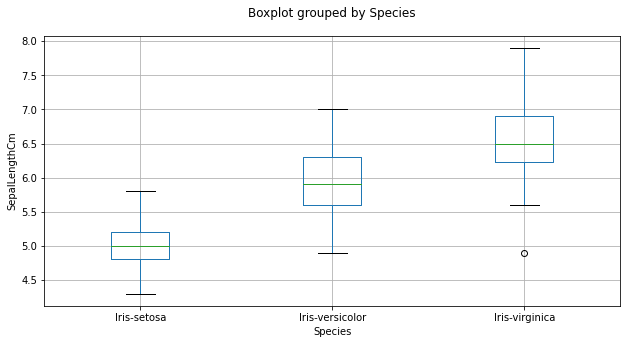

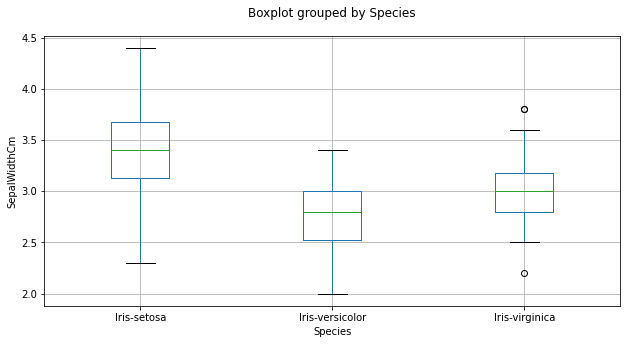

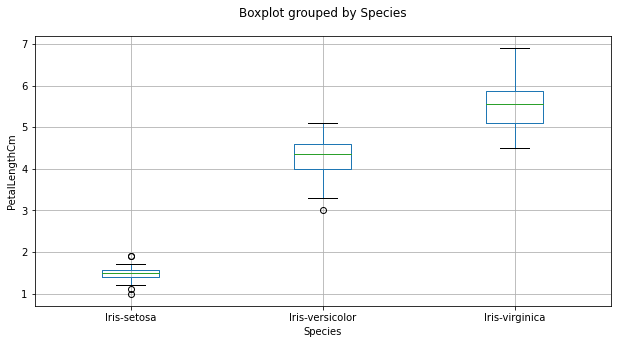

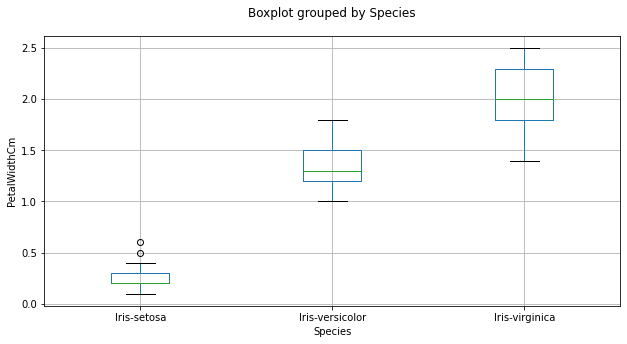

In [12]:
# Visualize the features using boxplots grouped by the target variable, 'Species'.
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
plt.figure(figsize=(5, 20))
for feature in features:
    data.boxplot(column=feature, by='Species', figsize=(10,5))
    plt.title(' ')
    plt.ylabel(feature)
plt.show()

Text(0.5, 1.0, 'Correlation map of variable correlations')

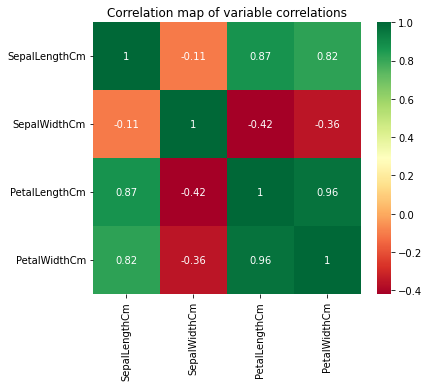

In [13]:
# Correlation Map.
# To obtain correlations of each variables in the dataset.
data_corr = data[data.columns[1:5]] # Id column is not considered as uninformative.
# To plot correlation heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(data_corr.corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation map of variable correlations')

In [14]:
# Define the Decision Tree Classifier.
model = DecisionTreeClassifier()
# Train the model using the train data.
model.fit(X.values,y)

DecisionTreeClassifier()

In [15]:
# To represent the Decision Tree in text form.
tree_listed = tree.export_text(model)
print(tree_listed)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



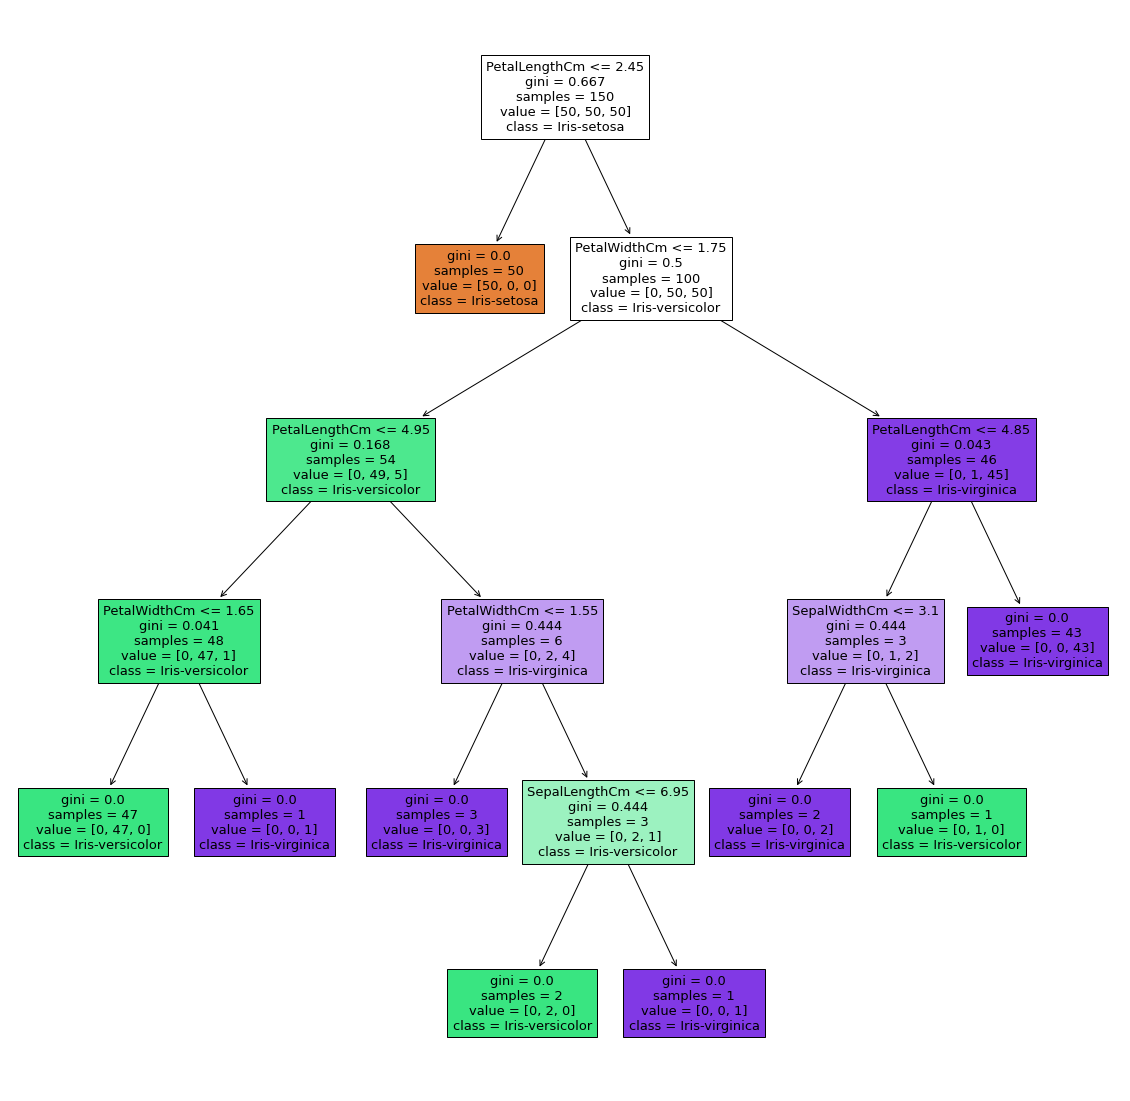

In [16]:
# To represent the Decision Tree graphically.
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # Target classes.
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model,feature_names=X.columns,class_names=classes,filled=True)

In [17]:
# Make prediction on any new data using the trained model.
# Create an array of feature arrays (Here with a single feature array).
X_new = np.array([[7.8, 4.3, 6.8, 2.3]])
print ('New sample: {}'.format(X_new[0]))
y_pred = model.predict(X_new)[0]
print ('Predicted class is', y_pred)

New sample: [7.8 4.3 6.8 2.3]
Predicted class is Iris-virginica
